<a href="https://colab.research.google.com/github/chrisjulio/INFO7017/blob/main/T3_2_k_CNN01_Christiano_Guilherme_Marcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#ff9900"> **CNN com Keras**</font>
---

As <font color="#66ffff"> Redes Neurais Convolucionais (Convolutional Neural Networks - **CNNs**)</font> são uma classe de algoritmos de aprendizado profundo projetados especificamente para analisar dados visuais, como imagens e vídeos. Elas são amplamente utilizadas em tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação de imagens. As CNNs alcançaram um sucesso notável nessas áreas, superando o desempenho humano em alguns casos.

O *building block* básico de uma CNN é uma `convolutional layer`. A operação de convolução envolve a aplicação de um conjunto de filtros aprendíveis (também conhecidos como *kernels*) aos dados de entrada. Esses filtros deslizam (*slide over*) sobre o espaço de entrada, realizando multiplicação elemento a elemento e agregando os resultados através da soma para produzir mapas de características. Os filtros capturam padrões ou características locais presentes na entrada, como bordas, texturas ou formas.

As CNNs também incorporam outras camadas para aprimorar suas capacidades. Um tipo comum é a camada de *pooling*, que reduz as dimensões espaciais dos mapas de características, retendo as informações mais relevantes. O `max pooling` é uma operação de *pooling* popular que seleciona o valor máximo dentro de cada janela de *pooling*, reduzindo o tamanho dos mapas de características.

Outra camada fundamental nas CNNs é a camada de ativação, que introduz não-linearidades na rede. Funções de ativação comuns usadas em CNNs incluem a `Rectified Linear Units (ReLU)`, que define valores negativos como zero e mantém os valores positivos inalterados, e variantes como `Leaky ReLU` e ``Parametric ReLU``. Essas não-linearidades permitem que a rede modele relações complexas entre os dados de entrada e a saída desejada.

As CNNs geralmente consistem em várias camadas convolucionais seguidas por camadas de pooling e ativação. As camadas finais de uma CNN são as camadas totalmente conectadas, também conhecidas como camadas densas, que levam as características de alto nível aprendidas das camadas anteriores e as mapeiam para as classes de saída ou previsões. Essas camadas são frequentemente seguidas por uma função de ativação `softmax` para produzir distribuições de probabilidade sobre as classes.

Durante o treinamento, as CNNs empregam um processo chamado retropropagação, em que a rede aprende os valores ótimos de seus parâmetros ajustando-os iterativamente para minimizar uma função de perda especificada. Esse ajuste é feito por meio de algoritmos de otimização como `Stochastic Gradient Descent (SGD)` ou suas variantes.

Para treinar CNNs de forma eficaz, é necessário um grande conjunto de dados rotulados. A rede aprende a reconhecer vários padrões e características generalizando a partir dos exemplos nos dados de treinamento. Uma vez treinadas, as CNNs podem ser implantadas para fazer previsões sobre novos dados não vistos.

Resumindo, as **CNNs são um tipo de modelo de aprendizado profundo projetado para análise de dados visuais**. Elas aproveitam camadas convolucionais para extrair características locais, camadas de *pooling* para reduzir dimensões espaciais e camadas de ativação para introduzir não-linearidades. Empilhando essas camadas, as CNNs podem **aprender representações hierárquicas dos dados de entrada**, permitindo que realizem tarefas como classificação de imagens, detecção de objetos e muito mais.

# **Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como ``TensorFlow`` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -``CNTK`` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e ``Theano`` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio ``TensorFlow`` vem com uma implementação particular do Keras, ``tf.keras``. Há suporte apenas ao ``TensorFlow`` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


Criação do Modelo
--

Vamos criar um modelo CNN simples. Mas antes vamos revisar os tipos de camadas (*layers*) tipicamente encontrados em uma CNN e sua representação em Keras.

``Sequential``é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si. Uma CNN pode ser instanciada como um modelo ``Sequential`` porque cada camada tem exatamente uma entrada e uma saída, e são empilhadas juntas para formar toda a rede.

Tipicamente, camadas em uma CNN são empilhadas da seguinte forma:
<font color="#ff9900">
par de camadas **Convolutional-Pooling** → par de camadas **Convolutional-Pooling** → uma camada **flattened** → camadas **Multiple dense**
</font>

> Cada *convolutional layer* é criada com um objeto da classe ``Conv2D`` que aplica a operação de convolução em um espaço 2D. Ou seja, o *kernel* (*filter*) é deslocado sobre a imagem de entrada.

Dentre os parâmetros importantes de ``Conv2D`` temos:
- ``filters`` ➡️ O número de filtros (*kernels*), também chamado de profundidade do mapa de características. É um número inteiro. Normalmente, aumentamos o número de filtros em cada camada convolucional, p.ex.: 16, 32, 64, 128, etc.

- ``kernel_size`` ➡️ Especifica a altura e largura da *kernel window* (convolução). Número inteiro ou uma tupla de dois números inteiros, como $(3, 3)$, $(5, 5)$, etc. Na maioria dos casos, a janela é um quadrado com a mesma altura e largura, podendo ser especificado como um único número inteiro, p. ex.: 3 para uma janela $(3, 3)$.

- ``strides`` ➡️ O número de *steps* (pixels) que movemos o filtro sobre a imagem de entrada. Recebe uma tupla para os passos ao longo da altura e largura. Se a altura e largura forem iguais, podemos usar um número inteiro. O padrão é $(1, 1)$.

- ``padding`` ➡️ Existem duas opções: ``valid`` ou ``same``. ``valid`` é sem padding e ``same`` resulta em *padding* com zeros de forma que o tamanho do *feature map* seja o mesmo que o tamanho da entrada quando ``strides=1``.

- ``activation`` ➡️ O tipo de função de ativação a ser usada na camada convolucional. O padrão é nenhuma ativação, o que é equivalente à ativação linear ou identidade. Geralmente, usamos a função de ativação ``relu`` em cada camada convolucional. Recordando, a função ReLU pode ser definida como
\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

- ``input_shape`` ➡️ Indica a altura, largura e profundidade da entrada como uma tupla de inteiros. Ou seja, este é o tamanho da imagem de entrada. É obrigatório especificar esse argumento na primeira camada convolucional se for a primeira camada no modelo imediatamente após a camada de entrada. Esse argumento não é incluído em outras camadas convolucionais intermediárias.

> Uma instância de ``MaxPooling2D`` representa uma *pooling layer*. Normalmente é usada em par com a camada convolucional. Existem dois tipos: **Max pooling** e **Average pooling**.

Dentre os parâmetros importantes de ``MaxPooling2D`` temos:

- ``pool_size`` ➡️ O tamanho da *pooling window*, sendo o padrão $(2, 2)$. Se a altura e largura forem iguais, podemos usar um número inteiro.

- ``strides`` ➡️ O número de *steps* (pixels) que movemos a ``pooling window``sobre o *feature map* em cada *step pooling*. Recebe uma tupla para os passos ao longo da altura e largura. Se a altura e largura forem iguais, podemos usar um número inteiro. O padrão é ``None`` usando assim ``pool_size``.

- ``padding`` ➡️ Existem duas opções: ``valid`` ou ``same``. ``valid`` é sem padding e ``same`` resulta em *padding* com zeros de forma que o tamanho do *feature map* seja o mesmo que o tamanho da entrada quando ``strides=1``.


> Nas CNNs existe uma *flattened layer* entre a camada final de *pooling* e a primeira camada totalmente conectada (*dense layer*). A *flattned layer* poder vista como uma coluna única. que armazena os valores de entrada. No Keras usamos a classe ``Flatten``.


> A camada final de uma CNN normalmente é uma *fully connected (dense) layer*. Em Keras temos a classe ``Dense`` e dentre seus parâmetros destacamos:

- ``units`` ➡️ Número de nodos (*units*) na camada. Um valor inteiro.

- ``activation`` ➡️ Tipo de função de ativação. Padrão é ``None``, isto é sem ativação (*linear*/*identity*).

- ``input_shape`` ➡️ Só necessário informar se for a primeira camada da CNN.

Arquitetura da CNN
--
Utilizaremos uma rede neural convolucional inspirada na arquitetura VGG simplificada para classificar imagens da base **CIFAR-10**. Esse conjunto de dados contém **imagens coloridas de tamanho 32x32 com 3 canais (RGB)**, distribuídas em **10 classes** (avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão).

A arquitetura será composta por **seis camadas convolucionais** com filtros 3x3, intercaladas com **camadas de max pooling 2x2**, seguidas de uma camada de **flatten** e duas camadas densas (fully connected), sendo a última com ativação **SoftMax** para previsão de probabilidades entre as classes.



Treinamento
--

Para treinar o modelo, utilizamos o método fit(), fornecendo como argumentos o conjunto de treinamento X_train, os rótulos correspondentes y_train, o número de épocas (epochs) e os dados de validação (X_valid e y_valid).

Durante o treinamento, o modelo atualiza seus pesos por meio do **algoritmo de otimização Adam**, minimizando a função de perda com base nos gradientes calculados para cada lote de dados (*batch*). Em cada época, todo o conjunto de treinamento é percorrido uma vez. O número de **épocas** determina quantas vezes esse ciclo completo será repetido.

Ao utilizar dados carregados diretamente em arrays (como é o caso do CIFAR-10), o número de **batches por época** é determinado automaticamente com base no **tamanho do lote** (batch_size) e na quantidade de amostras de treinamento. Por exemplo, com batch_size=64 e 45.000 imagens para treino, teremos aproximadamente 704 iterações por época **(45000 / 64 ≈ 704)**.

Aumentar o número de épocas permite que o modelo veja os dados várias vezes, o que pode **melhorar o aprendizado e a generalização**. No entanto, é importante encontrar um equilíbrio: muitas épocas podem levar ao **overfitting**, quando o modelo se ajusta demais aos dados de treino e perde desempenho em dados não vistos.

---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


Compilação
--

Antes de o modelo ser treinado, ele precisa ser **compilado** por meio do método compile(). Nesse momento, especificamos qual será a **função de perda** (loss) e o **otimizador** a ser utilizado. Opcionalmente, podemos definir as **métricas de avaliação** que desejamos acompanhar durante o processo de treinamento, como por exemplo, a **acurácia** (accuracy).

A função de perda escolhida será sparse_categorical_crossentropy, adequada para tarefas de **classificação com rótulos inteiros** (esparsos), onde cada instância pertence exatamente a **uma entre várias classes mutuamente exclusivas** — no caso do **CIFAR-10**, as classes são representadas por **índices de 0 a 9**.

O otimizador utilizado será o **Adam** *(adaptive moment estimation)*, que ajusta automaticamente a taxa de aprendizado com base em estimativas de momentos de gradiente (média e variância). Ele combina as abordagens de **momentum e adaptação de escala**, proporcionando convergência mais rápida e maior estabilidade, especialmente eficaz no treinamento de redes convolucionais profundas (CNNs).

O valor padrão da taxa de aprendizado (learning rate) no otimizador Adam é 0.001 (ou 1e−3), valor que adotaremos neste experimento.

Para acompanhar o desempenho do modelo durante o treinamento, utilizaremos a métrica sparse_categorical_accuracy. Essa métrica compara diretamente os **rótulos inteiros** previstos com os rótulos reais, sendo ideal para cenários onde os labels **não foram codificados como one-hot**.

Com a compilação finalizada, nosso modelo está pronto para ser treinado. Vamos em frente!

Observe que o **dataset CIFAR-10 já está dividido** em conjuntos de treinamento e teste. No entanto, vamos criar um **conjunto adicional de validação**, chamado X_valid, juntamente com os respectivos rótulos y_valid. Para isso, **reservaremos 5.000 instâncias do conjunto de treinamento original** para validação, e utilizaremos o restante para o treinamento efetivo do modelo.

Como utilizaremos uma **Rede Neural Convolucional (CNN)** treinada com o algoritmo **Gradient Descent (GD)**, é fundamental **normalizar os dados de entrada**. Neste caso, vamos **escalar os valores dos pixels para a faixa de 0 a 1**, dividindo-os por 255. Isso melhora a estabilidade e a eficiência do processo de aprendizado.

Observando o resultado do método summary(), a **coluna do meio** exibe a forma de saída de cada camada. Por exemplo, a primeira camada Conv2D tem uma saída de (None, 32, 32, 64), indicando as dimensões do feature map após a aplicação da primeira operação de convolução.

O tamanho do mapa de características é de **32×32**, e a **profundidade é 64** porque estão sendo utilizados 64 filtros nessa camada.

O primeiro valor na tupla é None, que representa o **tamanho do lote (batch size)**. Esse valor será definido dinamicamente no momento do treinamento, quando os dados forem fornecidos ao modelo.

A **coluna mais à direita** mostra o número de parâmetros treináveis em cada camada. Note que as camadas de **pooling** e **flatten** não possuem parâmetros, pois apenas realizam operações estruturais (como redução espacial ou reorganização de dados), sem pesos a serem ajustados durante o treinamento.

E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

# Início efetivo do código para a Atividade 3-2

Como já estudamos no exercício anterior os passos para chegar ao efetivo funcionamento do treinamento, vou manter somente o que for necessário para manter o entendimento do que está sendo executado.

A primeira mudança da Atividade 3-2 se reflete na arquitetura (conforme abaixo):

(era assim)

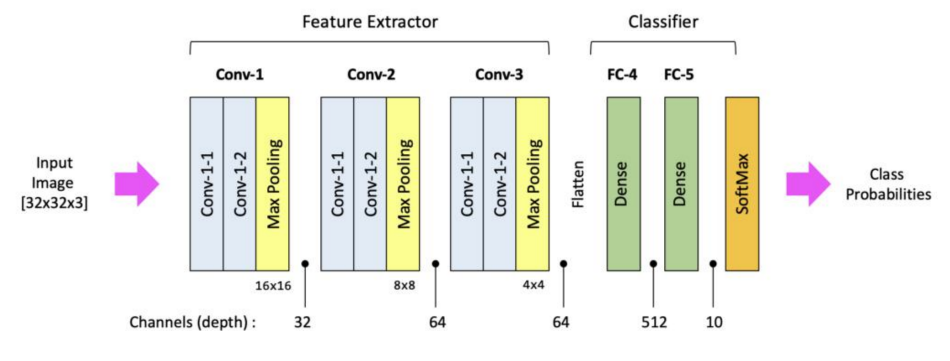

⬇⬇⬇

(ficará assim)

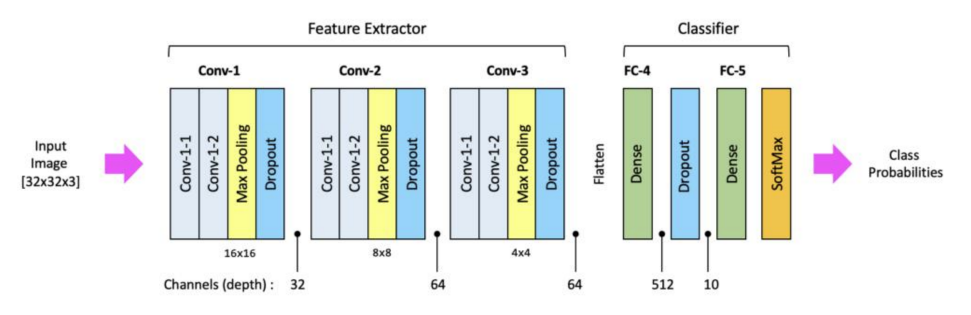

# Experimento 1:

Keras: 3.8.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/20
625/625 - 10s - 16ms/step - accuracy: 0.4401 - loss: 1.5411 - val_accuracy: 0.5788 - val_loss: 1.1585
Epoch 2/20
625/625 - 6s - 10ms/step - accuracy: 0.6278 - loss: 1.0516 - val_accuracy: 0.6659 - val_loss: 0.9517
Epoch 3/20
625/625 - 4s - 7ms/step - accuracy: 0.7011 - loss: 0.8494 - val_accuracy: 0.7100 - val_loss: 0.8355
Epoch 4/20
625/625 - 4s - 7ms/step - accuracy: 0.7518 - loss: 0.7058 - val_accuracy: 0.7228 - val_loss: 0.7991
Epoch 5/20
625/625 - 5s - 8ms/step - accuracy: 0.7872 - loss: 0.5999 - val_accuracy: 0.7588 - val_loss: 0.7192
Epoch 6/20
625/625 - 5s - 9ms/step - accuracy: 0.8270 - loss: 0.4935 - val_accuracy: 0.7622 - val_loss: 0.7367
Epoch 7/20
625/625 - 5s - 7ms/step - accuracy: 0.8607 - loss: 0.3969 - val_accuracy: 0.7526 - val_loss: 0.7622
Epoch 8/20
625/625 - 4s - 7ms/step - accuracy: 0.8884 - loss: 0.3182 - val_accuracy: 0.7662 - val_loss: 0.8130
Epoch 9/20
62

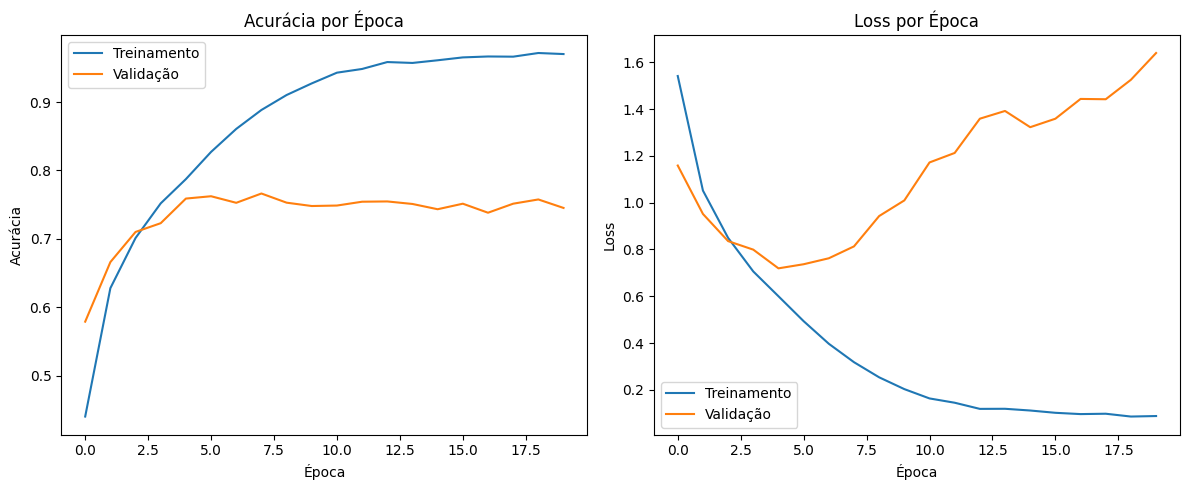

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1000
           1       0.86      0.88      0.87      1000
           2       0.60      0.71      0.65      1000
           3       0.54      0.56      0.55      1000
           4       0.75      0.66      0.70      1000
           5       0.66      0.66      0.66      1000
           6       0.79      0.80      0.79      1000
           7       0.78      0.79      0.78      1000
           8       0.81      0.88      0.84      1000
           9       0.91      0.77      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


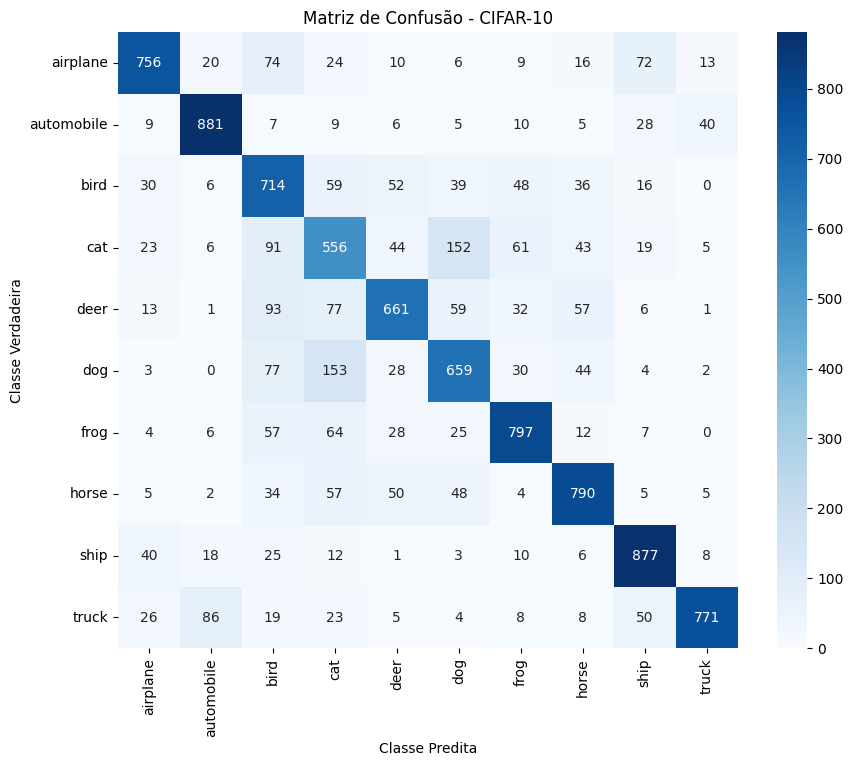

In [ ]:
# o código abaixo foi modificado para economizar memória, cpu, gpu e créditos do colab :)

# Limpeza e preparação do ambiente
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report

# Limpar sessões anteriores para liberar memória da GPU
K.clear_session()
gc.collect()

# Exibe a versão do Keras e verifica GPU
print(f'Keras: {keras.__version__}')
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

# Carregamento e preparação dos dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Definição do modelo CNN com Dropout conforme diagrama fornecido
model = models.Sequential([
    #Entrada Explicita
    keras.Input(shape=(32, 32, 3)),

    # Bloco Conv-1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Bloco Conv-2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Bloco Conv-3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Classificador (Fully Connected)
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    verbose=2)

# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')

# Curvas de loss e accuracy
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Relatório de classificação
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


# Matriz de confusão
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gera predições e converte para rótulos
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Define os nomes das classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plota a matriz de confusão como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão - CIFAR-10')
plt.show()


**Análise:**

Accuracy:

- Treinamento sobe muito rapidamente até quase 97%;

- Validação sobe até 0.76, mas depois oscila e não melhora;


Loss:

- Cai até quase zero;

- atinge mínimo de 0,71, mas depois sobe de novo até 1.64;


Acurácia: 74%

Conclusão: Overfitting

# Experimento 2:

Adição de Dropout:

Conforme sugere o enunciado, após o *polling layer* e eliminando neurônios do *feature map*.


Keras: 3.8.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/20
625/625 - 11s - 18ms/step - accuracy: 0.3613 - loss: 1.7004 - val_accuracy: 0.5208 - val_loss: 1.3241
Epoch 2/20
625/625 - 4s - 7ms/step - accuracy: 0.5408 - loss: 1.2702 - val_accuracy: 0.5960 - val_loss: 1.1289
Epoch 3/20
625/625 - 5s - 8ms/step - accuracy: 0.6067 - loss: 1.0994 - val_accuracy: 0.6151 - val_loss: 1.0931
Epoch 4/20
625/625 - 5s - 8ms/step - accuracy: 0.6461 - loss: 0.9961 - val_accuracy: 0.6913 - val_loss: 0.8682
Epoch 5/20
625/625 - 4s - 7ms/step - accuracy: 0.6745 - loss: 0.9193 - val_accuracy: 0.7151 - val_loss: 0.8056
Epoch 6/20
625/625 - 5s - 7ms/step - accuracy: 0.6938 - loss: 0.8624 - val_accuracy: 0.7246 - val_loss: 0.7739
Epoch 7/20
625/625 - 4s - 7ms/step - accuracy: 0.7089 - loss: 0.8208 - val_accuracy: 0.7270 - val_loss: 0.7737
Epoch 8/20
625/625 - 4s - 7ms/step - accuracy: 0.7256 - loss: 0.7800 - val_accuracy: 0.7312 - val_loss: 0.7580
Epoch 9/20
625

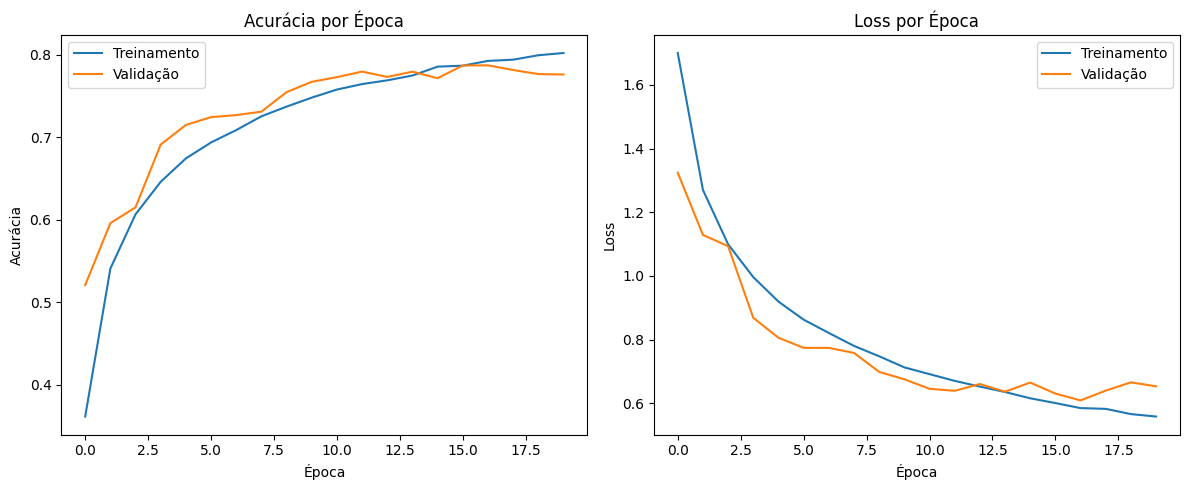

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1000
           1       0.90      0.92      0.91      1000
           2       0.68      0.67      0.67      1000
           3       0.66      0.50      0.57      1000
           4       0.65      0.83      0.73      1000
           5       0.72      0.65      0.68      1000
           6       0.65      0.92      0.77      1000
           7       0.86      0.77      0.81      1000
           8       0.92      0.84      0.88      1000
           9       0.90      0.84      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


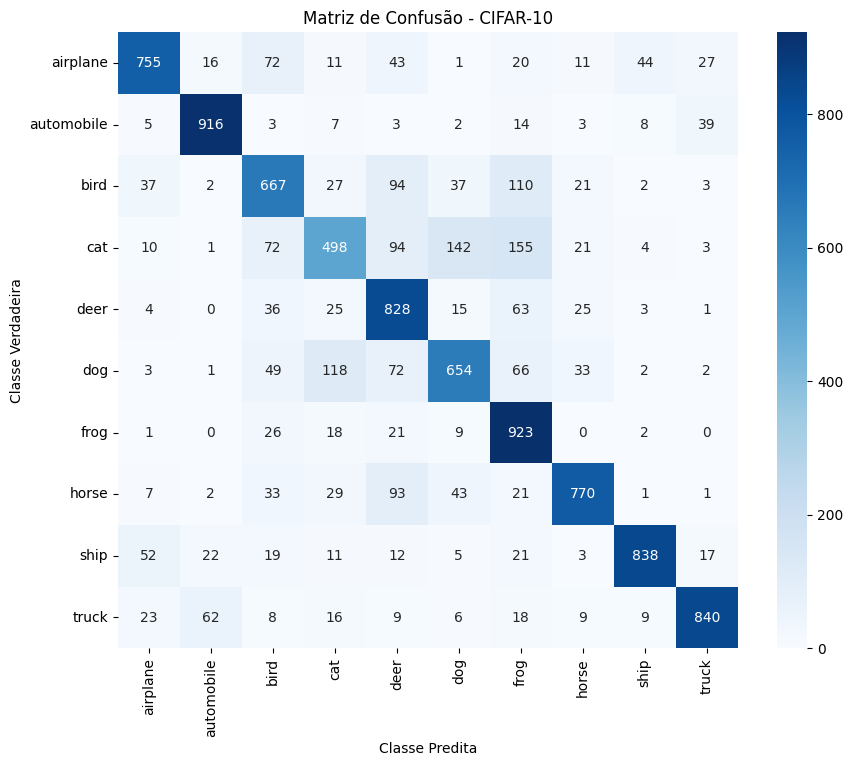

In [ ]:
# o código abaixo foi modificado para economizar memória, cpu, gpu e créditos do colab :)

# Limpeza e preparação do ambiente
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report

# Limpar sessões anteriores para liberar memória da GPU
K.clear_session()
gc.collect()

# Exibe a versão do Keras e verifica GPU
print(f'Keras: {keras.__version__}')
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

# Carregamento e preparação dos dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Definição do modelo CNN com Dropout conforme diagrama fornecido
model = models.Sequential([
    #Entrada Explicita
    keras.Input(shape=(32, 32, 3)),

    # Bloco Conv-1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Bloco Conv-2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Bloco Conv-3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Classificador (Fully Connected)
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    verbose=2)

# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')

# Curvas de loss e accuracy
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Relatório de classificação
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


# Matriz de confusão
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gera predições e converte para rótulos
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Define os nomes das classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plota a matriz de confusão como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão - CIFAR-10')
plt.show()

**Análise:**

Accuracy:

- treinamento progressivo, estabilizando em 80% nas últimas epochs;

- validação acompanhou o treino, ficando em 78%, mas estável;


Loss:

- treinamento e validação caem juntas;

- validação estabiliza com oscilações pequenas;


Acurácia: 77%

Conclusão: sem Overfitting

Obs: alguns resultados são piores na análise dos agrupamentos [(dog, cat, deer),(truck, automobile)], mas isso não é preocupante, uma vez que são os mais confusos e similares entre si.

# Experimento 3:

Só por diversão mesmo, vou meter um data augmentation e earlydropout 😀

Keras: 3.8.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/20
781/781 - 40s - 52ms/step - accuracy: 0.3519 - loss: 1.7430 - val_accuracy: 0.4896 - val_loss: 1.4264
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 1s - 2ms/step - accuracy: 0.5625 - loss: 1.3575 - val_accuracy: 0.4776 - val_loss: 1.4855
Epoch 3/20
781/781 - 31s - 39ms/step - accuracy: 0.4982 - loss: 1.3803 - val_accuracy: 0.5000 - val_loss: 1.4032
Epoch 4/20
781/781 - 1s - 2ms/step - accuracy: 0.5312 - loss: 1.4317 - val_accuracy: 0.4985 - val_loss: 1.4217
Epoch 5/20
781/781 - 39s - 50ms/step - accuracy: 0.5620 - loss: 1.2276 - val_accuracy: 0.6260 - val_loss: 1.0383
Epoch 6/20
781/781 - 1s - 1ms/step - accuracy: 0.5781 - loss: 1.2603 - val_accuracy: 0.6267 - val_loss: 1.0304
Epoch 7/20
781/781 - 28s - 36ms/step - accuracy: 0.6004 - loss: 1.1276 - val_accuracy: 0.6552 - val_loss: 0.9736
Epoch 8/20
781/781 - 1s - 1ms/step - accuracy: 0.5781 - loss: 1.0921 - val_accuracy: 0.6539 - val_loss: 0.9829
Epoch 9/20
781/781 - 29s - 37ms/step - accuracy: 0.6223 - loss: 1.0630 - val_accuracy: 0.6613 - val_loss: 0.9711
Epoch 10/20
781/781 - 1s - 1ms/step - accuracy: 0.6875 - loss: 1.0248 - val_accuracy: 0.6749 - val_loss: 0.9376
Epo

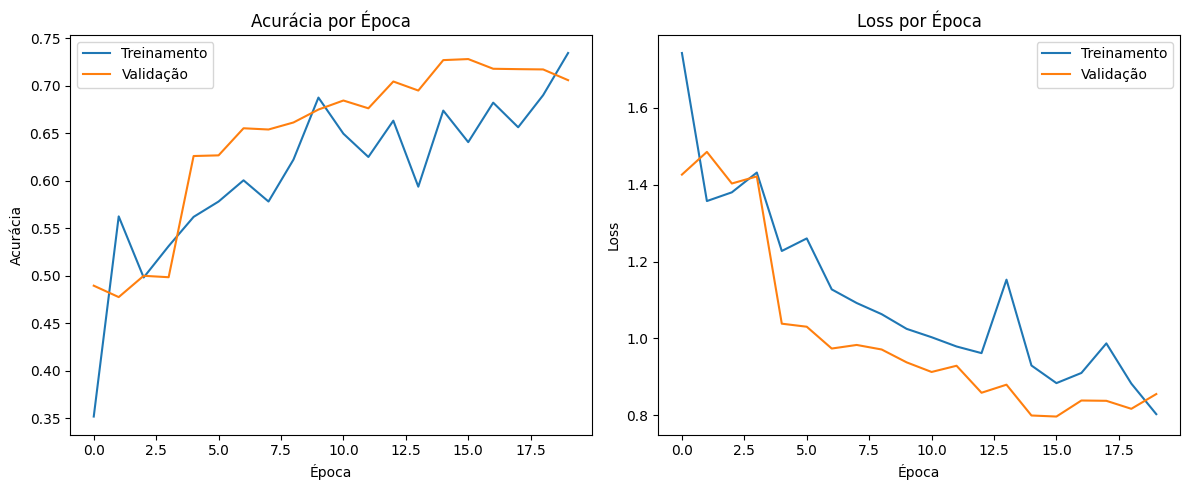

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      1000
           1       0.89      0.89      0.89      1000
           2       0.76      0.46      0.58      1000
           3       0.53      0.48      0.51      1000
           4       0.67      0.62      0.65      1000
           5       0.75      0.46      0.57      1000
           6       0.47      0.95      0.63      1000
           7       0.85      0.71      0.77      1000
           8       0.86      0.84      0.85      1000
           9       0.75      0.90      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.70     10000
weighted avg       0.73      0.71      0.70     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


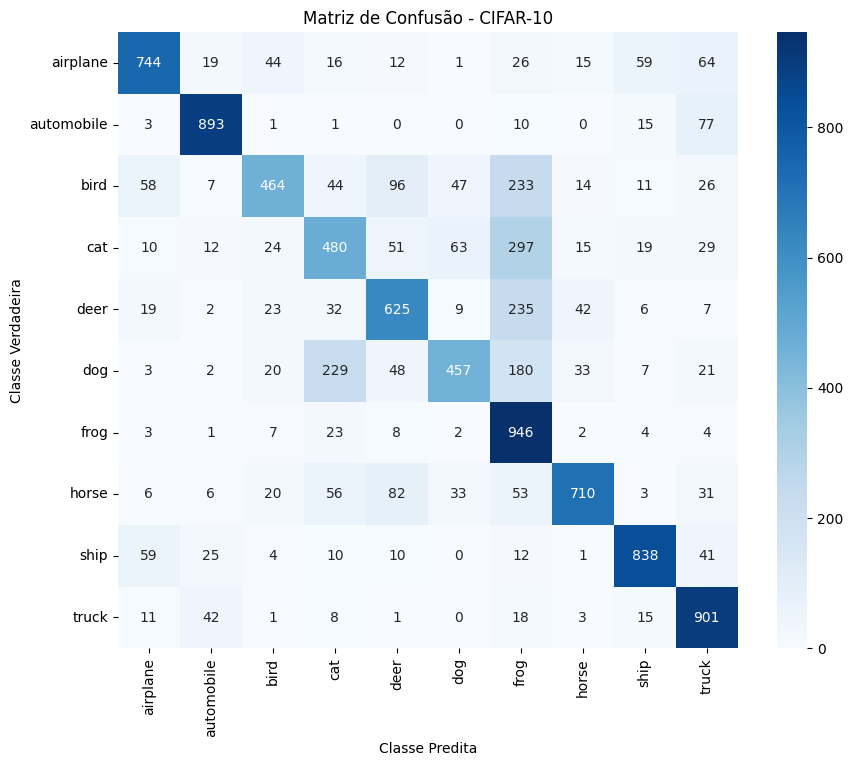

In [ ]:
# o código abaixo foi modificado para economizar memória, cpu, gpu e créditos do colab :)

# Limpeza e preparação do ambiente
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report

# Limpar sessões anteriores para liberar memória da GPU
K.clear_session()
gc.collect()

# Exibe a versão do Keras e verifica GPU
print(f'Keras: {keras.__version__}')
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

# Carregamento e preparação dos dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Definição do modelo CNN com Dropout conforme diagrama fornecido
model = models.Sequential([
    #Entrada Explicita
    keras.Input(shape=(32, 32, 3)),

    # Bloco Conv-1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Bloco Conv-2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Bloco Conv-3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Classificador (Fully Connected)
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criador de imagens com aumento de dados
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajusta o gerador aos dados de treino
datagen.fit(X_train)

# Treinamento com generator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=20,
    steps_per_epoch=X_train.shape[0] // 64,
    verbose=2
)

# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')

# Curvas de loss e accuracy
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Relatório de classificação
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


# Matriz de confusão
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gera predições e converte para rótulos
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Define os nomes das classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plota a matriz de confusão como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão - CIFAR-10')
plt.show()

piorou... augmentation sem early stop fica zoado. vou fazer último teste...

# Experimento 4:

Keras: 3.8.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/50
782/782 - 38s - 49ms/step - accuracy: 0.3569 - loss: 1.7272 - val_accuracy: 0.5134 - val_loss: 1.3334
Epoch 2/50
782/782 - 28s - 36ms/step - accuracy: 0.5097 - loss: 1.3427 - val_accuracy: 0.5798 - val_loss: 1.1773
Epoch 3/50
782/782 - 29s - 37ms/step - accuracy: 0.5806 - loss: 1.1740 - val_accuracy: 0.6287 - val_loss: 1.0274
Epoch 4/50
782/782 - 29s - 37ms/step - accuracy: 0.6210 - loss: 1.0679 - val_accuracy: 0.6656 - val_loss: 0.9760
Epoch 5/50
782/782 - 30s - 38ms/step - accuracy: 0.6481 - loss: 0.9942 - val_accuracy: 0.6785 - val_loss: 0.9239
Epoch 6/50
782/782 - 28s - 36ms/step - accuracy: 0.6661 - loss: 0.9465 - val_accuracy: 0.6929 - val_loss: 0.8773
Epoch 7/50
782/782 - 30s - 38ms/step - accuracy: 0.6824 - loss: 0.9005 - val_accuracy: 0.6937 - val_loss: 0.8715
Epoch 8/50
782/782 - 28s - 36ms/step - accuracy: 0.6943 - loss: 0.8698 - val_accuracy: 0.7166 - val_loss: 0.8238


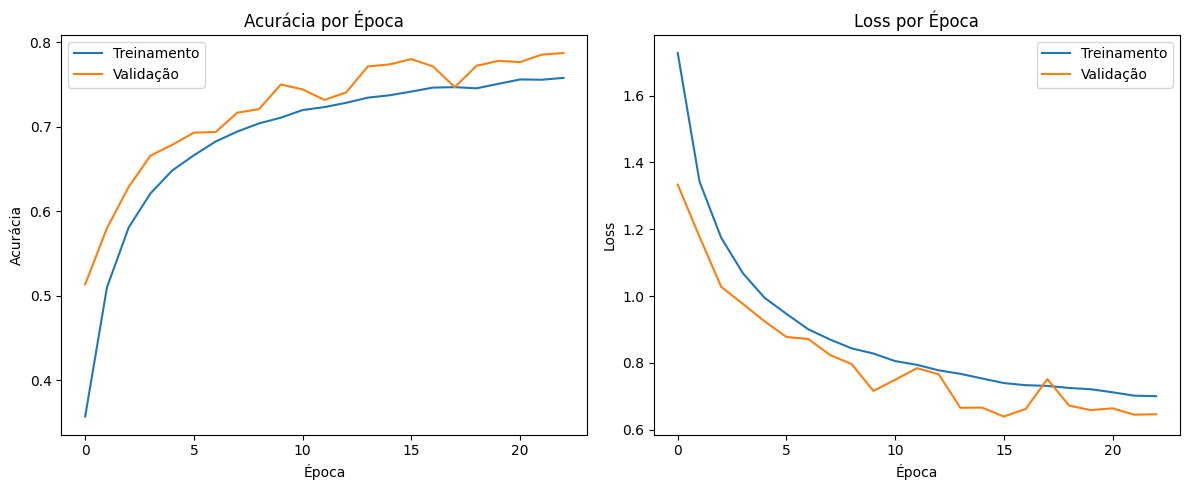

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.93      0.88      0.91      1000
           2       0.79      0.58      0.67      1000
           3       0.71      0.52      0.60      1000
           4       0.73      0.77      0.75      1000
           5       0.74      0.66      0.70      1000
           6       0.66      0.92      0.77      1000
           7       0.82      0.83      0.83      1000
           8       0.90      0.86      0.88      1000
           9       0.79      0.93      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



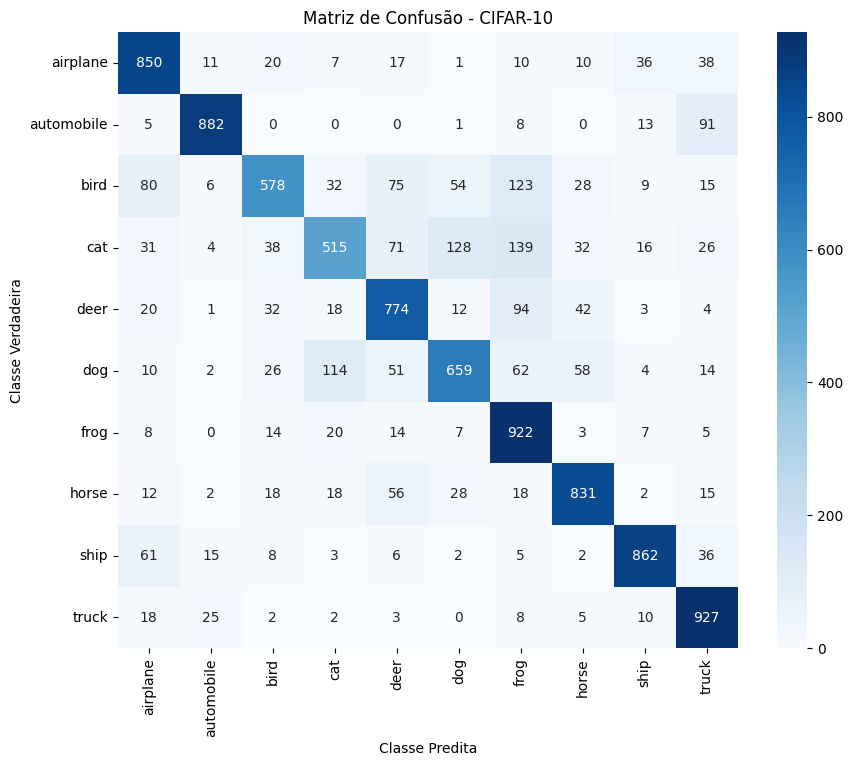

In [ ]:
# o código abaixo foi modificado para economizar memória, cpu, gpu e créditos do colab :)

# Limpeza e preparação do ambiente
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Limpar sessões anteriores para liberar memória da GPU
K.clear_session()
gc.collect()

# Exibe a versão do Keras e verifica GPU
print(f'Keras: {keras.__version__}')
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

# Carregamento e preparação dos dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Definição do modelo CNN com Dropout conforme diagrama fornecido
model = models.Sequential([
    # Entrada Explícita
    keras.Input(shape=(32, 32, 3)),

    # Bloco Conv-1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Bloco Conv-2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Bloco Conv-3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Classificador (Fully Connected)
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Criador de imagens com aumento de dados leve e consistente
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)

# Ajusta o gerador aos dados de treino
datagen.fit(X_train)

# EarlyStopping para evitar overfitting prolongado
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Treinamento com generator + EarlyStopping
train_generator = datagen.flow(X_train, y_train, batch_size=64)

history = model.fit(
    train_generator,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop],
    verbose=2
)


# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')

# Curvas de loss e accuracy
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Relatório de classificação
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gera predições e converte para rótulos
cm = confusion_matrix(y_test, y_pred)

# Define os nomes das classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plota a matriz de confusão como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão - CIFAR-10')
plt.show()

Conclusão:

O que mudou:

- DropOut
- DataAugmentation (calibrado!)
- EarlyStopping (50 épocas, mas não executou todas)

Resultado:

78%

Melhor resultado até agora, com melhorias nos quesitos mais difíceis de antes (gato, cachorro - principalmente).

*Les carottes sont cuites!* 🥕🥕🥕